In [185]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdulist=fits.open("/Users/krish/Desktop/CFI Summer School/Horizon/Tasks/Task 1 Hands on Astronomy/gll_iem_v02_P6_V11_DIFFUSE.fit")
hdulist #Shows two objects in this list

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000025B3071B640>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x0000025B2F552FD0>]

In [186]:
hdulist.info()

#Our FITS file has two HDUs; primary header represents the dimensions of an image. first extension shows that of a table.

Filename: /Users/krish/Desktop/CFI Summer School/Horizon/Tasks/Task 1 Hands on Astronomy/gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


In [187]:
hdu.header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

Here we can see that it has 3 data axes with units deg, deg and MeV respectively, basically representing position (Galactic Longitude and Galactic Latitude) and Energy of pixel.

In [188]:
#List of answers to Question 4 under Tasks:
anslist={30,'photon energy','MeV','GLAST','Michelson'}

In [189]:
#Extracting data from primary HDU:
hdu=hdulist[0]
img_data=hdu.data #Data corresponding to primary HDU

#First slice of data:
imdata=hdu.data[0] 

#Maximum Pixel value:
print("Maximum Pixel value is: ",np.max(imdata))

#Minimum Pixel value:
print("Minimum Pixel value is: ",np.min(imdata))

#Standard Deviation of data:
print("Standard Deviation of data is: ",np.std(imdata))

Maximum Pixel value is:  4.5921523e-05
Minimum Pixel value is:  7.027717e-08
Standard Deviation of data is:  1.3843595e-06


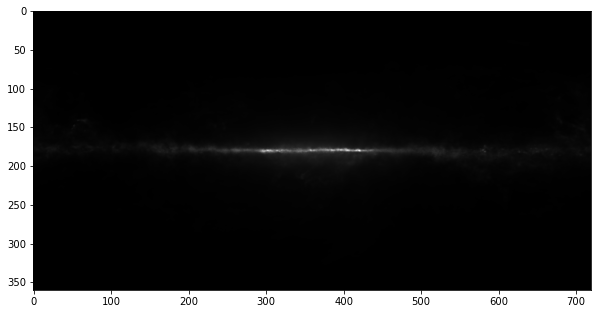

In [190]:
plt.figure(figsize = (10,10))
plt.imshow(imdata,vmin=np.min(imdata),vmax=np.max(imdata),cmap='gray')
plt.show()

In [191]:
#Stacking every 5th slice and repeating above methods:

imdatanew=[]
for i in range(4,len(img_data),5):
    imdatanew.append(img_data[i])

    
imdatanew=sum(imdatanew)
#Maximum Pixel value:
print("Maximum Pixel value is: ",np.max(imdatanew))

#Minimum Pixel value:
print("Minimum Pixel value is: ",np.min(imdatanew))

#Standard Deviation of data:
print("Standard Deviation of data is: ",np.std(imdatanew))

Maximum Pixel value is:  1.0907543e-05
Minimum Pixel value is:  1.2774165e-08
Standard Deviation of data is:  3.5807247e-07


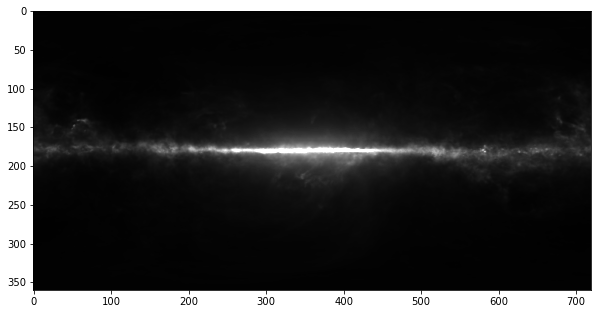

In [192]:
plt.figure(figsize = (10,10))
plt.imshow(imdata,vmin=np.min(imdatanew),vmax=np.max(imdatanew),cmap='gray')
plt.show()

## Creating function to plot Altitude and Azimuth of a celestial object:

In [198]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

In [378]:
def plotaltaz(coords,tstart):
#tstart being the desired time of observation (time at current location)
#coords being coordinates of object at that instant.
    objloc2=SkyCoord(coords,unit=(u.hourangle,u.deg))

    iitm=EarthLocation(lat=12.992*u.deg,lon=80.234*u.deg,height=50*u.m) #location of iitm
    obstimearray=np.arange(tstart-5.5*u.hour,tstart+12*u.hour-5.5*u.hour,1*u.min)

    altcoords_h=[]
    for time in obstimearray:
        altcoords_h.append((objloc2.transform_to(AltAz(location=iitm,obstime=time))).alt)

    azcoords_h=[]
    for time in obstimearray:
        azcoords_h.append((objloc2.transform_to(AltAz(location=iitm,obstime=time))).az)   

    tarr=np.linspace(0,720,720)
    plt.figure()
    plt.ylabel("degrees")
    plt.xlabel("12 hour time span (in mins)")
    plt.title("Variance of Azimuth and Altitude of Object with time")
    return(plt.plot(tarr,altcoords_h,label="Altitude"),plt.plot(tarr,azcoords_h,label="Azimuth"),plt.legend())   

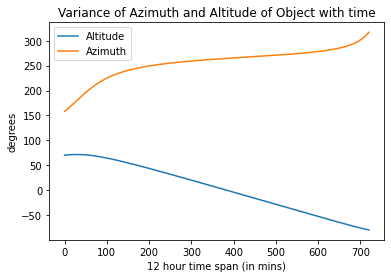

In [380]:
#For the object given in task:

plotaltaz(["5:35:17 -5:23:28"],Time('2022-7-11 10:00:00'))
plt.show()

In [385]:
coords=["5:35:17 -5:23:28"]
objloc2=SkyCoord(coords,unit=(u.hourangle,u.deg))
objloc2

<SkyCoord (ICRS): (ra, dec) in deg
    [(83.82083333, -5.39111111)]>

The above mentioned object is Messier 42 (M42), The Orion Nebula.

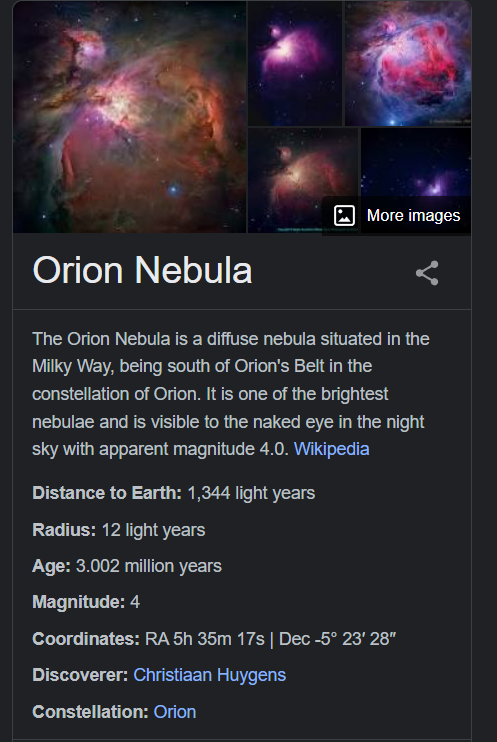